In [1]:
import cv2
import os
import mediapipe as mp
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint


In [2]:
import os
import cv2
import mediapipe as mp

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Input and output directories
input_dir = "Dataset"
output_dir = "annotated_gait_images"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process images from the input directory
for class_label in os.listdir(input_dir):
    class_dir = os.path.join(input_dir, class_label)
    output_class_dir = os.path.join(output_dir, class_label)
    os.makedirs(output_class_dir, exist_ok=True)

    # Process images in the class directory
    for filename in os.listdir(class_dir):
        # Load input image
        image_path = os.path.join(class_dir, filename)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        # Convert image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Perform pose estimation
        results = pose.process(image_rgb)

        # Draw skeleton on the image
        if results.pose_landmarks:
            mp_drawing = mp.solutions.drawing_utils
            annotated_image = image.copy()
            mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Save the annotated image with skeleton in the corresponding class directory
            output_image_path = os.path.join(output_class_dir, filename)
            cv2.imwrite(output_image_path, annotated_image)

# Release resources
pose.close()


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import os
import matplotlib.pyplot as plt


In [4]:
import os

current_directory = os.getcwd()
print("Current directory:", current_directory)




Current directory: c:\Users\shash\Downloads\gaitml


In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
data_dir = "annotated_gait_images"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# Create train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List all classes in the dataset
classes = os.listdir(data_dir)

# Iterate over each class
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    
    # List all images in the class directory
    images = os.listdir(class_dir)
    
    # Split the images into train and test sets
    train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)
    
    # Move train images to the train directory
    for image in train_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(train_dir, class_name, image)
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        shutil.copy(src, dst)
    
    # Move test images to the test directory
    for image in test_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(test_dir, class_name, image)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
        shutil.copy(src, dst)

# Define transforms for data augmentation and normalization
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

print(data_dir)


PermissionError: [Errno 13] Permission denied: 'annotated_gait_images\\test\\class1'

In [4]:
# Define paths
data_dir = "annotated_gait_images"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# Define transforms for data augmentation and normalization
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


print(data_dir)


annotated_gait_images


In [12]:
# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the ResNet-152 model
model = models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # Change output to 4 classes

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9, weight_decay=0.6)


c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Train Loss: 1.2350, Test Loss: 0.9801, Train Acc: 52.27%, Test Acc: 78.56%
Epoch [2/10], Train Loss: 0.9180, Test Loss: 0.6792, Train Acc: 77.03%, Test Acc: 95.84%
Epoch [3/10], Train Loss: 0.7184, Test Loss: 0.4764, Train Acc: 90.26%, Test Acc: 96.06%
Epoch [4/10], Train Loss: 0.5679, Test Loss: 0.3417, Train Acc: 94.14%, Test Acc: 99.56%
Epoch [5/10], Train Loss: 0.4499, Test Loss: 0.2536, Train Acc: 95.65%, Test Acc: 99.56%
Epoch [6/10], Train Loss: 0.3768, Test Loss: 0.1927, Train Acc: 96.22%, Test Acc: 99.34%
Epoch [7/10], Train Loss: 0.3089, Test Loss: 0.1635, Train Acc: 97.16%, Test Acc: 99.78%
Epoch [8/10], Train Loss: 0.2614, Test Loss: 0.1300, Train Acc: 97.64%, Test Acc: 99.56%
Epoch [9/10], Train Loss: 0.2399, Test Loss: 0.1001, Train Acc: 97.35%, Test Acc: 99.78%
Epoch [10/10], Train Loss: 0.2082, Test Loss: 0.0943, Train Acc: 98.49%, Test Acc: 99.56%


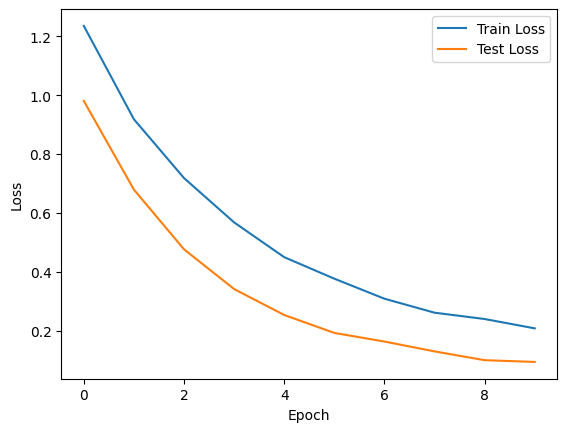

In [13]:
# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    correct_train = 0
    correct_test = 0

    # Training
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()

    # Testing
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()

    # Calculate average losses
    train_loss = train_loss / len(train_loader.dataset)
    test_loss = test_loss / len(test_loader.dataset)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Print progress
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, '
          f'Test Loss: {test_loss:.4f}, '
          f'Train Acc: {100.0 * correct_train / len(train_loader.dataset):.2f}%, '
          f'Test Acc: {100.0 * correct_test / len(test_loader.dataset):.2f}%')

# Plot the training and testing losses
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the trained model
torch.save(model.state_dict(), 'best.pth')



c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


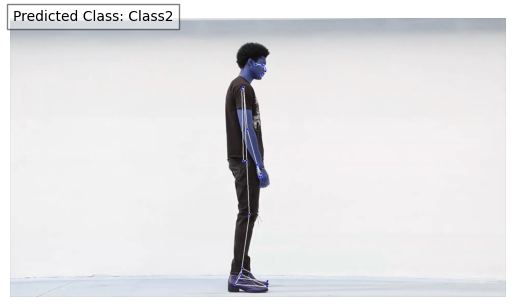

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp
import os

# Define transforms for test image
inference_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the trained model
num_classes = 4  # Change to 4 classes
model = models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)  # Change output to 4 classes
model.load_state_dict(torch.load('best.pth', map_location=torch.device('cpu')))  # Load the model state dict
model.eval()

# Define class labels
class_labels = ['Class1', 'Class2', 'Class3', 'Class4', 'UnAuthorized']

# Define confidence threshold
confidence_threshold = 0.7  # adjust according to your needs

# Function to predict class for an image
def predict_image_class(image_path):
    image = Image.open(image_path)
    image_tensor = inference_transforms(image).unsqueeze(0)
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        max_probability, predicted = torch.max(probabilities, 1)
        max_probability = max_probability.item()
        class_index = predicted.item() if max_probability > confidence_threshold else len(class_labels) - 1  
        return class_index

# Inference on a test image
test_image_path = 'Dataset/class2/frame_0324.jpg'  # Path to the test image
predicted_class_index = predict_image_class(test_image_path)
predicted_class = class_labels[predicted_class_index]

# the remaining code here

# Display the image with the predicted class label on top
image = cv2.imread(test_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Perform pose estimation
results = pose.process(image_rgb)

# Draw skeleton on the image
if results.pose_landmarks:
    mp_drawing = mp.solutions.drawing_utils
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Display the annotated image with the predicted class label on top
    plt.imshow(annotated_image)
    plt.axis('off')
    plt.text(10, 10, f'Predicted Class: {predicted_class}', bbox=dict(facecolor='white', alpha=0.5))
    plt.show()
else:
    print("No pose landmarks detected in the image.")

# Release resources
pose.close()
